In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Tarea 1

Lo primero será darle dimensiones a la imagen para la primera tarea: dibujar un tablero de ajedrez de 800x800.

In [2]:
#Dimensiones de la imagen a crear según la tarea
ancho = 800
alto = 800

Se le dará color a la imagen, resultando un fondo negro.

In [3]:
black_img = np.zeros((alto, ancho, 1), dtype=np.uint8)
print(black_img.shape)

(800, 800, 1)


Se muestra la imagen con imshow. Lo que se hace es ir saltando en cuadrados de 100 x 100. Se suma la parte entera de cada columna y fila del bloque. Si es par, se pinta de blanco. Si no, de negro. De esta forma, los colores se van alternando para que parezca un tablero de ajedrez como se ha solicitado.

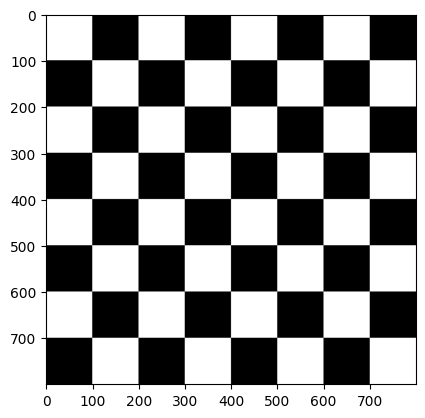

In [4]:
black_img = np.zeros((alto, ancho), dtype=np.uint8)
for x in range(0, ancho, 100):
    for y in range(0, alto, 100):
        if (x//100 + y//100) % 2 == 0:
            black_img[y:y+100, x:x+100] = 255
        else:
            black_img[y:y+100, x:x+100] = 0

plt.imshow(black_img, cmap='gray')
plt.show()

## Tarea 2

Como segunda tarea se debe de crear una imagen con estilo Mondrian. Para ello, se vuelve a usar el fondo negro al que se le irá añadiendo los diferentes cuadros que forman este tipo de arte.

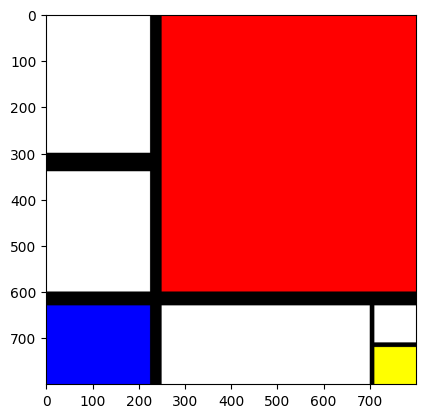

In [5]:
black_img = np.zeros((alto, ancho, 3), dtype=np.uint8)

# Rojo
black_img[0:600,250:ancho, 0] = 255 #tercer índice especifica un canal (0-2)

# Blanco esquina izquierda superior
black_img[0:300, 0:225, 0] = 255
black_img[0:300, 0:225, 1] = 255
black_img[0:300, 0:225, 2] = 255

# Blanco lateral izquierdo
black_img[340:600, 0:225, 0] = 255
black_img[340:600, 0:225, 1] = 255
black_img[340:600, 0:225, 2] = 255

# Azul abajo a la izquierda
black_img[630:800, 0:225, 2] = 255

# Blanco abajo

black_img[630:800, 250:700, 0] = 255
black_img[630:800, 250:700, 1] = 255
black_img[630:800, 250:700, 2] = 255

# Blanco abajo a la derecha
black_img[630:710, 710:800, 0] = 255
black_img[630:710, 710:800, 1] = 255
black_img[630:710, 710:800, 2] = 255

# Amarillo abajo a la derecha
black_img[720:800, 710:800, 0] = 255
black_img[720:800, 710:800, 1] = 255
black_img[720:800, 710:800, 2] = 0


plt.imshow(black_img)
plt.show()

## Tarea 5

Se usará la cámara y así se obtienen las dimensiones de la imagen que capta esta. Por otro lado, se convierte la imagen de BGR a HSV (tono, saturación, brillo, respectivamente). Es este caso, los valores más importantes son los asociados a la v, el brillo. El círculo azul captura el punto más claro y el rojo, el píxel más oscuro. Para finalizar, se muestra la iamgen y se sale de la cámara pulsando la tecla ESC.

In [6]:
vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()

    if ret:
        frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(frameHSV)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(v)
        # En azul tenemos el valor del pixel más claro
        cv2.circle(frame, maxLoc, 10, (255, 0, 0), 2)

        # En rojo tenemos el valor del pixel más oscuro
        cv2.circle(frame, minLoc, 10, (0, 0, 255), 2)


        cv2.imshow('Original', frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()